In [182]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
import math
from collections import Counter

# Load Data

In [183]:
# load data
csv_file_path = r"C:\Users\miree\Downloads\archive\Iris.csv"

In [184]:
# read data
df_data = pd.read_csv(csv_file_path)


In [185]:
df_data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [186]:
# Data inspection.
#display first 5 rows from the data
df_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [187]:
df_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [188]:
df_data.shape

(150, 6)

In [189]:
# Data inspection.
# relevent function for understand the data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [190]:
# Data inspection.
df_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [191]:
# Data inspection.
df_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [192]:
# Data inspection.
df_data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [193]:
df_data.duplicated().sum()

0

# Scatter Plot

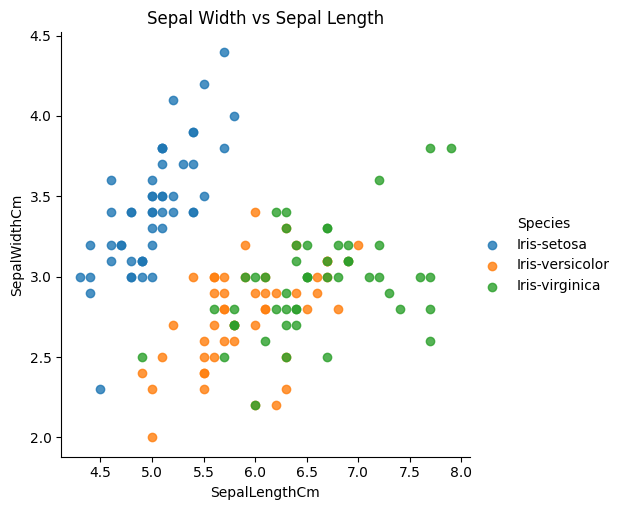

In [194]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df_data, hue='Species', fit_reg=False)
plt.title('Sepal Width vs Sepal Length')
plt.savefig('sepal.pdf',dpi=500)
plt.show()

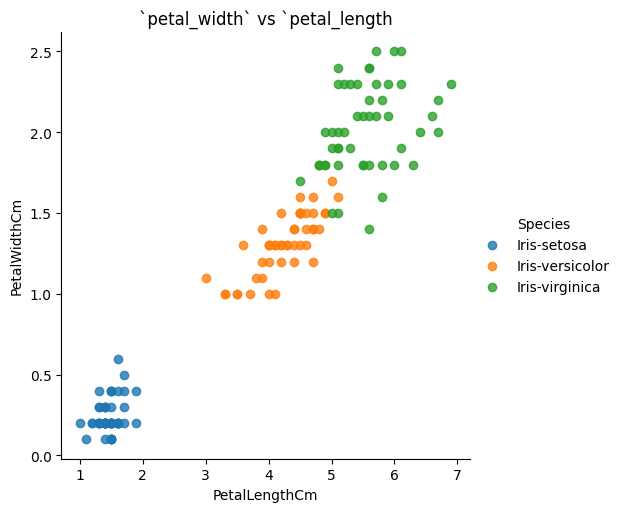

In [195]:
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df_data, hue='Species', fit_reg=False)
plt.title('`petal_width` vs `petal_length')
plt.savefig('petal.pdf',dpi=500)
plt.show()

In [196]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_data['Species'] = label_encoder.fit_transform(df_data['Species'])

In [197]:
df_data.drop(columns='Id', inplace=True)
df_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [198]:
x = df_data.drop('Species', axis=1)
y = df_data.Species

In [199]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [200]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [201]:
# Split data into train and test data
x_train,x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)


In [202]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [203]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: Species, Length: 120, dtype: int32

In [204]:
# function for calculate the eculedean distance
def euclidean_distance(x1, x2):
 return math.sqrt(np.sum((x1 - x2)**2))

In [205]:
# function for calculate the manhattan distancce 
def manhattan_distance(x1, x2):
 return np.sum(np.abs(x1 - x2))

In [206]:
# function for calculate the cos similarity 
def cos_similarity(x1,x2):
    return 1-(np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2)))


In [207]:
class KNN:

    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        if self.metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.metric == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.metric == 'cosine':
            distances = [cos_similarity(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError("Invalid metric. Use 'euclidean', 'manhattan', or 'cosine'.")
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [208]:
knn = KNN()
knn.fit(x_train.values, y_train.values)  # Convert DataFrame to numpy array
pred = knn.predict(x_test.values)  # Convert DataFrame to numpy array
acc = accuracy_score(y_test, pred)

In [209]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score:", accuracy)

# Count correct and wrong predictions
correct_predictions = (pred == y_test).sum()
wrong_predictions = len(pred) - correct_predictions
print("Correct Predictions:", correct_predictions)
print("Wrong Predictions:", wrong_predictions)


Accuracy Score: 1.0
Correct Predictions: 30
Wrong Predictions: 0


In [210]:
# Run the KNeighborsClassifier that you have made from scratch on the training set,
# using the 3 distance measures (euclidean, manhattan, cosine)
knn_euclidean = KNN(k=3, metric='euclidean')
knn_manhattan = KNN(k=3, metric='manhattan')
knn_cosine = KNN(k=3, metric='cosine')



In [211]:
# Fit the models
knn_euclidean.fit(x_train.values, y_train.values)
knn_manhattan.fit(x_train.values, y_train.values)
knn_cosine.fit(x_train.values, y_train.values)

In [212]:

# Predictions
pred_euclidean = knn_euclidean.predict(x_test.values)
pred_manhattan = knn_manhattan.predict(x_test.values)
pred_cosine = knn_cosine.predict(x_test.values)

In [213]:
# Accuracy scores
acc_euclidean = accuracy_score(y_test, pred_euclidean)
acc_manhattan = accuracy_score(y_test, pred_manhattan)
acc_cosine = accuracy_score(y_test, pred_cosine)

print("Accuracy (Euclidean):", acc_euclidean)
print("Accuracy (Manhattan):", acc_manhattan)
print("Accuracy (Cosine):", acc_cosine)

Accuracy (Euclidean): 1.0
Accuracy (Manhattan): 1.0
Accuracy (Cosine): 0.9666666666666667


In [214]:

# Count correct and wrong predictions
correct_euclidean = (pred_euclidean == y_test).sum()
correct_manhattan = (pred_manhattan == y_test).sum()
correct_cosine = (pred_cosine == y_test).sum()

wrong_euclidean = len(pred_euclidean) - correct_euclidean
wrong_manhattan = len(pred_manhattan) - correct_manhattan
wrong_cosine = len(pred_cosine) - correct_cosine


In [215]:
print("Euclidean: \nCorrect Predictions:", correct_euclidean, "\nWrong Predictions:", wrong_euclidean)
print("\nManhattan: \nCorrect Predictions:", correct_manhattan, "\nWrong Predictions:", wrong_manhattan)
print("\nCosine: \nCorrect Predictions:", correct_cosine, "\nWrong Predictions:", wrong_cosine)

Euclidean: 
Correct Predictions: 30 
Wrong Predictions: 0

Manhattan: 
Correct Predictions: 30 
Wrong Predictions: 0

Cosine: 
Correct Predictions: 29 
Wrong Predictions: 1
